Classification des données Iris

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

C:\Users\Rudyl\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


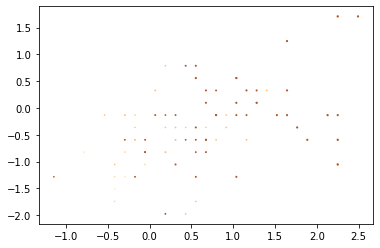

In [16]:
#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

plt.scatter(X_norm[:,0], X_norm[:,1],X_norm[:,2] ,c=y, cmap=plt.cm.Paired)

1- Avant de construire notre arbre de décision, nous allons séparer notre jeu de données en deux : 70% pour l'apprentissage et 30% pour le test.

In [17]:
#Séparation des données en train et en test
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3, random_state=0)

for train_index, test_index in cv.split(X_norm, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

2- Nous allons maintenant définir un arbre de décision en utilisant comme critère l'entropie.

a) Premièrement, créons un arbre puis entrainons le.

In [18]:
# Train
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

Une fois l'arbre crée et l'apprentissage terminé, nous pouvons visualiser cet arbre.

[Text(111.60000000000001, 201.90857142857143, 'X[2] <= -0.658\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(74.4, 170.84571428571428, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(148.8, 170.84571428571428, 'X[3] <= 0.462\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(74.4, 139.78285714285715, 'X[2] <= 0.706\nentropy = 0.316\nsamples = 35\nvalue = [0, 33, 2]'),
 Text(37.2, 108.72, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(111.60000000000001, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 139.78285714285715, 'X[2] <= 0.734\nentropy = 0.316\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(186.0, 108.72, 'X[1] <= -0.362\nentropy = 0.764\nsamples = 9\nvalue = [0, 2, 7]'),
 Text(148.8, 77.65714285714284, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(223.20000000000002, 77.65714285714284, 'X[3] <= 0.725\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(186.0, 46.59428571428572, 'entropy = 

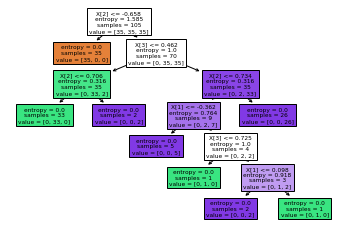

In [19]:
tree.plot_tree(clf, filled=True)

In [20]:
clf.predict(X_test)
print(cross_val_score(clf, X_train, y_train, cv=cv))
print(cross_val_score(clf, X_test, y_test, cv=cv))

[0.96875 0.90625 0.9375  0.9375  0.9375 ]
[0.92857143 1.         0.92857143 0.92857143 1.        ]


In [21]:
clf.score(X_train, y_train)


1.0

In [22]:
clf.score(X_test, y_test)

0.9555555555555556

3- Nous allons maintenant chercher à avoir les meilleurs performances afin de connaître les paramètres optimaux de max_depth et min_samples_split.

In [23]:
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 500, 1000],
      "min_samples_split": [2, 3, 5, 10, 15, 20, 30, 50, 100]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=cv, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

Fitting 5 folds for each of 117 candidates, totalling 585 fits


0.9111111111111111

Afficher les meilleurs paramètres en fonction de la meilleur accuracy :

In [24]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 3, 'min_samples_split': 5}


Afficher la meilleur accuracy :

In [12]:
best_result = grid_search.best_score_
print(best_result)

0.94375
